# 19기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [2]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

In [3]:
df.info()    # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [12]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, random_state=2023, test_size=0.1)

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()

transformed_train = scaler.fit_transform(train_data)
transformed_test = scaler.transform(test_data)

In [9]:
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
scaled_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


# K-means

# 시도 1

## 2. Clustering

In [16]:
from sklearn.cluster import KMeans

n_cluster = []
sse = []
for n in range(3, 21, 2):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(transformed_train)
    n_cluster += [n]
    sse += [kmeans.inertia_]

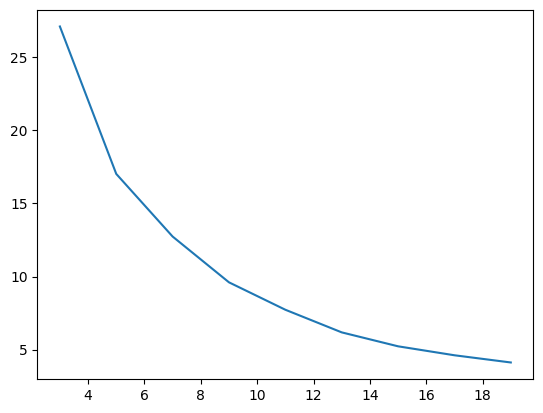

In [17]:
import matplotlib.pyplot as plt

plt.plot(n_cluster, sse)

In [18]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(train_data)

KMeans(n_clusters=9)

In [20]:
clustered_train = kmeans.predict(train_data)
clustered_test = kmeans.predict(test_data)

print(len(clustered_train))
clustered_train

180


array([3, 1, 5, 4, 1, 3, 3, 1, 1, 6, 1, 4, 1, 4, 7, 3, 2, 6, 1, 2, 0, 3,
       2, 2, 3, 3, 4, 6, 2, 1, 1, 0, 2, 5, 0, 2, 1, 4, 6, 2, 3, 2, 2, 4,
       6, 4, 0, 3, 0, 2, 1, 5, 5, 8, 5, 1, 3, 3, 3, 7, 5, 6, 7, 5, 6, 6,
       2, 4, 3, 2, 3, 3, 5, 3, 0, 5, 4, 2, 6, 6, 2, 6, 0, 3, 1, 1, 3, 0,
       6, 3, 6, 2, 3, 2, 3, 2, 3, 3, 3, 8, 5, 6, 3, 2, 3, 5, 3, 6, 1, 2,
       3, 6, 5, 8, 4, 6, 3, 8, 3, 5, 1, 3, 3, 4, 2, 1, 6, 4, 2, 4, 0, 3,
       0, 1, 1, 3, 2, 8, 1, 6, 8, 2, 5, 7, 1, 8, 0, 3, 6, 1, 6, 4, 2, 3,
       1, 6, 6, 0, 4, 2, 2, 3, 3, 5, 0, 1, 4, 3, 1, 1, 1, 5, 3, 0, 3, 4,
       1, 1, 4, 6])

## 3. Evaluation

In [21]:
from sklearn.metrics import silhouette_score

mean_score = silhouette_score(train_data, clustered_train)
print(mean_score)

0.4182926993551763


# 시도 2

## 2. Clustering

In [29]:
from sklearn.cluster import KMeans

n_cluster = []
sse = []
for n in range(3, 21, 2):
    kmeans = KMeans(n_clusters=n, init = 'k-means++')
    kmeans.fit(transformed_train)
    n_cluster += [n]
    sse += [kmeans.inertia_]

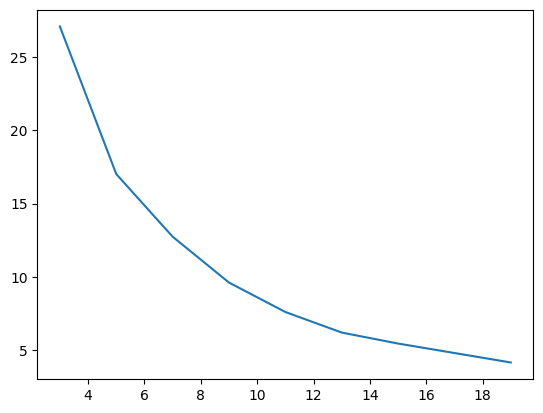

In [30]:
import matplotlib.pyplot as plt

plt.plot(n_cluster, sse)

In [37]:
kmeans = KMeans(n_clusters=7, init = 'k-means++')
kmeans.fit(train_data)

KMeans(n_clusters=7)

In [38]:
clustered_train = kmeans.predict(train_data)
clustered_test = kmeans.predict(test_data)

print(len(clustered_train))
clustered_train

180


array([1, 4, 6, 2, 4, 1, 1, 4, 4, 5, 4, 2, 0, 2, 3, 1, 3, 5, 4, 3, 5, 1,
       3, 3, 1, 1, 2, 5, 3, 4, 4, 5, 3, 6, 5, 3, 4, 2, 5, 3, 1, 3, 3, 2,
       5, 2, 2, 1, 5, 3, 4, 6, 6, 0, 6, 4, 1, 1, 1, 3, 6, 5, 3, 6, 5, 5,
       3, 2, 1, 3, 1, 1, 6, 1, 2, 6, 2, 3, 5, 5, 3, 5, 6, 1, 4, 4, 1, 5,
       5, 1, 5, 3, 1, 3, 1, 3, 1, 1, 1, 0, 6, 5, 1, 3, 1, 6, 1, 5, 4, 3,
       1, 5, 6, 0, 2, 5, 1, 0, 1, 6, 4, 1, 1, 2, 3, 4, 5, 2, 3, 2, 5, 1,
       5, 4, 4, 1, 3, 0, 4, 5, 0, 3, 6, 3, 4, 0, 5, 1, 5, 4, 5, 2, 3, 1,
       4, 5, 5, 5, 2, 3, 3, 1, 1, 6, 5, 4, 2, 5, 4, 0, 4, 6, 1, 5, 1, 2,
       4, 0, 2, 5])

## 3. Evaluation

In [39]:
from sklearn.metrics import silhouette_score

mean_score = silhouette_score(train_data, clustered_train)
print(mean_score)

0.44838413993785226


실루엣 계수가 0.5를 넘진 못했으나 초기화 방법을 달리 적용하니 약간 개선이 되었다.